In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")
#dropping the columns which don't effect accuracy of nework
#these colums are object type and occupying lot of space when we do OHE
del df["Cabin"]
del df["Name"]
#df.info()
#print(df["SibSp"].unique())

#Finding null values and replacing them with mode
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
#print(df.isnull().sum()/len(df))



In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target=["Survived"]
#df.info()
cat_col=["Ticket","Embarked"]
df["Sex"]=np.where(df["Sex"]=='male',0,1)
num_col=["Sex","PassengerId","Pclass","Age","SibSp","Parch","Fare"]


In [30]:
def create_ohe(df,col):
    le=LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe=OneHotEncoder(sparse=False)
    column_names=[col+"_"+str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a),columns=column_names))
temp=df[num_col]
for column in cat_col:
    temp_df=create_ohe(df,column)
    temp=pd.concat([temp,temp_df],axis=1)
    
temp.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 691 entries, Sex to Embarked_S
dtypes: float64(686), int32(1), int64(4)
memory usage: 4.7 MB


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a L

In [31]:
temp.info()
#all objects are converted into int,float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 691 entries, Sex to Embarked_S
dtypes: float64(686), int32(1), int64(4)
memory usage: 4.7 MB


In [95]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import History
history=History()
x_train,x_test,y_train,y_test=train_test_split(temp,df["Survived"],random_state=200,test_size=0.5)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,random_state=200,test_size=0.3)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_t_s=scaler.transform(x_train)
scaler.fit(x_val)
x_v_s=scaler.transform(x_val)
scaler.fit(x_test)
x_te_s=scaler.transform(x_test)
print(x_t_s.shape)
print(x_v_s.shape)
print(x_te_s.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(311, 691)
(134, 691)
(446, 691)
(311,)
(446,)
(134,)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input 

In [96]:
model=Sequential()
model.add(Dense(150,input_dim=691,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(2,activation="relu"))
model.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,2)
y_test=np_utils.to_categorical(y_test,2)
y_val=np_utils.to_categorical(y_val,2)
model.fit(x_t_s,y_train,validation_data=(x_v_s,y_val),epochs=8,batch_size=64,callbacks=[history])

Train on 311 samples, validate on 134 samples
Epoch 1/8
311/311 [==============================] - 3s 8ms/step - loss: 0.4430 - acc: 0.5949 - val_loss: 0.4464 - val_acc: 0.5970
Epoch 2/8
311/311 [==============================] - 0s 208us/step - loss: 0.3613 - acc: 0.6045 - val_loss: 0.4285 - val_acc: 0.6045
Epoch 3/8
311/311 [==============================] - 0s 194us/step - loss: 0.2972 - acc: 0.6045 - val_loss: 0.4456 - val_acc: 0.6045
Epoch 4/8
311/311 [==============================] - 0s 176us/step - loss: 0.2648 - acc: 0.6077 - val_loss: 0.4407 - val_acc: 0.6045
Epoch 5/8
311/311 [==============================] - 0s 187us/step - loss: 0.2461 - acc: 0.6109 - val_loss: 0.4380 - val_acc: 0.6045
Epoch 6/8
311/311 [==============================] - 0s 188us/step - loss: 0.2379 - acc: 0.6206 - val_loss: 0.4338 - val_acc: 0.5970
Epoch 7/8
311/311 [==============================] - 0s 183us/step - loss: 0.2325 - acc: 0.6495 - val_loss: 0.4359 - val_acc: 0.6045
Epoch 8/8
311/311 [======

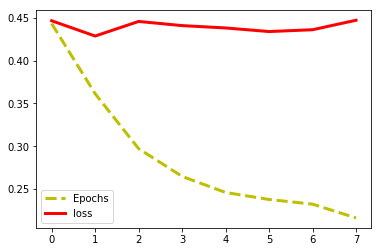

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
#adding some styles to the graph
plt.plot(history.history['loss'],'y--',label="Epochs",linewidth=3)
plt.plot(history.history['val_loss'],'r',label="loss",linewidth=3)
plt.legend()

In [73]:
model.predict(x_test)

array([[12.314688  ,  8.978937  ],
       [11.722452  ,  3.701777  ],
       [17.110605  ,  7.33062   ],
       [15.639633  ,  6.6072435 ],
       [10.720021  ,  4.772978  ],
       [ 0.93619084,  0.9159306 ],
       [ 1.228692  ,  0.33477595],
       [ 1.8969123 ,  1.84283   ],
       [11.806059  ,  4.8020105 ],
       [13.931807  ,  6.0405574 ],
       [ 3.459043  ,  2.3207054 ],
       [ 7.1917696 ,  2.7141943 ],
       [ 6.883413  ,  7.1798306 ],
       [ 5.074001  ,  5.246782  ],
       [17.090956  ,  6.9678316 ],
       [ 7.2994447 ,  3.0475206 ],
       [16.766077  ,  5.9254622 ],
       [ 4.2962556 ,  4.4492216 ],
       [16.63057   ,  7.032797  ],
       [ 6.5197463 ,  5.8026805 ],
       [ 8.530403  ,  4.686054  ],
       [ 9.879131  ,  3.5052683 ],
       [ 9.68852   ,  4.4810915 ],
       [14.090661  ,  6.081676  ],
       [ 6.611725  ,  1.3287183 ],
       [ 4.353226  ,  0.35819608],
       [ 8.8972435 ,  7.7735114 ],
       [11.148637  ,  5.4381943 ],
       [14.750632  ,

In [75]:
model.evaluate(x_test,y_test)

446/446 [==============================] - 0s 90us/step


[6.59778458120577, 0.6524663666438629]

In [76]:
model.evaluate(x_val,y_val)

134/134 [==============================] - 0s 110us/step


[6.45643453455683, 0.6194029850746269]

In [77]:
model.evaluate(x_t_s,y_train)

311/311 [==============================] - 0s 116us/step


[0.07143858366217644, 0.9871382636655949]

In [78]:
model.evaluate(x_v_s,y_val)

134/134 [==============================] - 0s 123us/step


[0.39575182724354874, 0.7164179095581397]